In [1]:
import cv2

In [2]:
from decord import VideoReader, cpu
from pathlib import Path

VIDEO_DIR = Path("../data/videos")
video1 = "cc0904d3de995d4851de65b93860d8d5.mp4"
video2 = "cc0904d3de995d4851de65b93860d8d5.mp4"

In [3]:
vr = VideoReader(str(Path(VIDEO_DIR, video1)), ctx=cpu(0))
frame1 = vr[520*10].asnumpy()
vr = VideoReader(str(Path(VIDEO_DIR, video2)), ctx=cpu(0))
frame2 = vr[122*10].asnumpy()

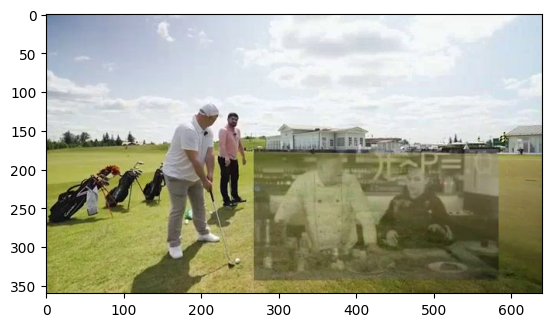

In [4]:
import matplotlib.pyplot as plt

plt.imshow(frame1)

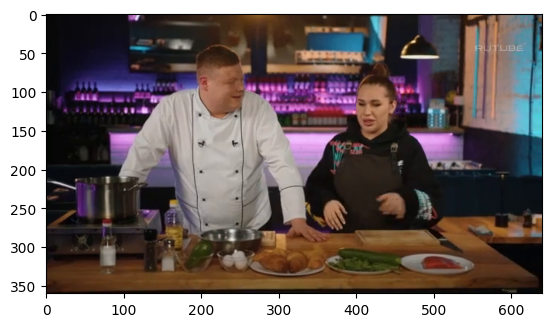

In [5]:
plt.imshow(frame2)

7


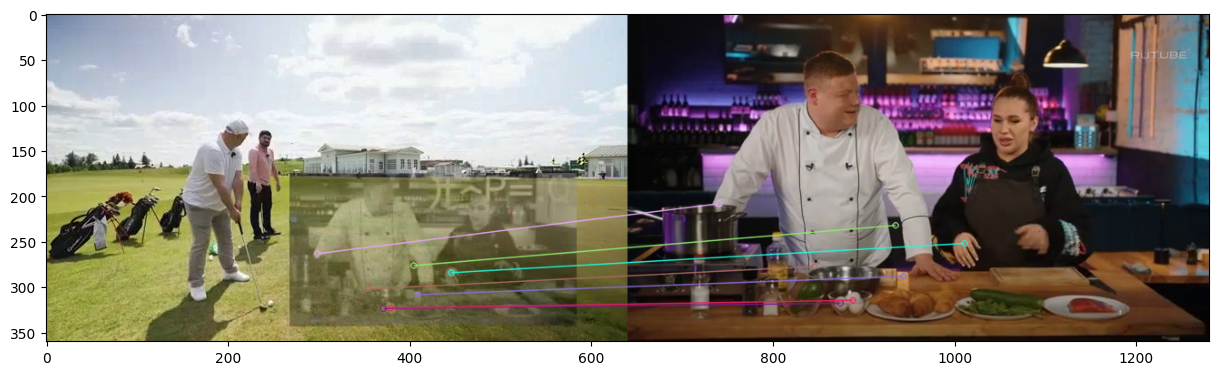

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
frame1_gr = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2_gr = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

 
# Initiate SIFT detector
sift = cv2.SIFT_create()
 
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(frame1_gr, None)
kp2, des2 = sift.detectAndCompute(frame2_gr, None)
 
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
 
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])

print(len(good))

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(frame1,kp1,frame2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.figure(figsize=(15, 10)) 
plt.imshow(img3)
plt.show()